In [9]:
import sys
import pandas as pd
import sklearn
from sklearn.cross_validation import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import homogeneity_score,completeness_score,v_measure_score,accuracy_score
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from copy import deepcopy

from sklearn.feature_selection import RFE

TRAIN_TEST_RATIO = 0.25

In [10]:

data = pd.read_csv('dermatology.data.txt', sep=",", header = None)

# [1-11,34] podaci pre analiza
# [12-33] podaci nakon analiza
data.columns = cols = ["erythema", "scaling", "definite borders", "itching","koebner phenomenon",
                "polygonal papules","follicular papules","oral mucosal involvement","knee and elbow involvement",
                "scalp involvement","family history","melanin incontinence","eosinophils in the infiltrate","PNL infiltrate",
                "fibrosis of the papillary dermis","exocytosis","acanthosis","hyperkeratosis","parakeratosis","clubbing of the rete ridges",
               "elongation of the rete ridges","thinning of the suprapapillary epidermis","spongiform pustule","munro microabcess","focal hypergranulosis",
               "disappearance of the granular layer","vacuolisation and damage of basal layer","spongiosis","saw-tooth appearance of retes","follicular horn plug",
               "perifollicular parakeratosis","inflammatory monoluclear inflitrate","band-like infiltrate","Age","des_class"]

# data.head()

#izbaciti redove koje sadrze '?' u koloni za godine
# print(len(data))
data = data[data.Age != '?']
print(len(data))
data = data[data.des_class != 6]
print(len(data))

#izbaciti godine za probu

# data = data.drop('Age',1)


results = data['des_class']

#normalize




cols = data.columns

min_max_scaler = MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(data)
data = pd.DataFrame(np_scaled)


data.columns = cols

attributes = data.drop('des_class',1)
results.head()
# print(attributes[attributes.columns[1]])
# attributes.head()
# print(len(results))

358
338


0    2
1    1
2    3
3    1
4    3
Name: des_class, dtype: int64

In [11]:

train_data, test_data,train_results,test_results = train_test_split(attributes, results ,test_size=TRAIN_TEST_RATIO)


print('%d - %d' % (len(train_results), len(test_results)))


253 - 85


In [12]:


# naci najbitinije feature
model = ExtraTreesClassifier(n_estimators=250)
model.fit(data, results)
print(model.feature_importances_)
# cols = deepcopy(train_data.columns)
# print(len(cols))
# for idx,elem in enumerate(model.feature_importances_):
    
#     if float(elem) < float(0.01):
#         print(cols[idx])
       
#         train_data = train_data.drop(cols[idx],1)
#         test_data = test_data.drop(cols[idx],1)


model = LogisticRegression()
rfe = RFE(model, 10)
fit = rfe.fit(data, results)
print(fit.n_features_)
print(fit.support_)
print(fit.ranking_)

cols = deepcopy(data.columns)

print(len(cols))

# for idx,elem in enumerate(fit.support_):
    
#     if not elem:
#         print(elem)
#         print(idx)
#         print(cols[idx])
       
#         train_data = train_data.drop(cols[idx],1)
#         test_data = test_data.drop(cols[idx],1)




[  4.40831753e-03   1.16492175e-02   6.70496737e-03   1.55458554e-02
   2.88652714e-02   4.11011470e-02   1.46881669e-03   2.63115344e-02
   2.56351206e-02   1.67728627e-02   2.88886192e-03   3.18256307e-02
   8.08094903e-03   2.32425072e-02   6.00868438e-02   2.56051763e-02
   4.84680906e-03   3.48730481e-03   8.26405052e-03   6.58060967e-02
   5.88212702e-02   6.68878634e-02   6.07587803e-03   1.51142967e-02
   2.77297883e-02   1.86378312e-02   4.38729337e-02   5.62006923e-02
   3.49365802e-02   2.75088492e-04   3.62464138e-05   2.58057025e-03
   4.73134963e-02   2.79223065e-03   2.06127893e-01]
10
[False False False False  True  True False False False False False False
 False False  True False False False False  True  True  True False False
 False False False  True  True False False False  True False  True]
[16  5 14  2  1  1 21  8 10 12 24  9 13  3  1  6 15 23 22  1  1  1 19 17 11
  7  4  1  1 25 26 18  1 20  1]
35


In [13]:
GNB = GaussianNB().fit(train_data,train_results)


In [14]:
predicted = GNB.predict(test_data)
accuracy_score(predicted,test_results)


# print(homogeneity_score(predicted,test_results))
# print(completeness_score(predicted,test_results))
# print(v_measure_score(predicted,test_results))


0.84705882352941175

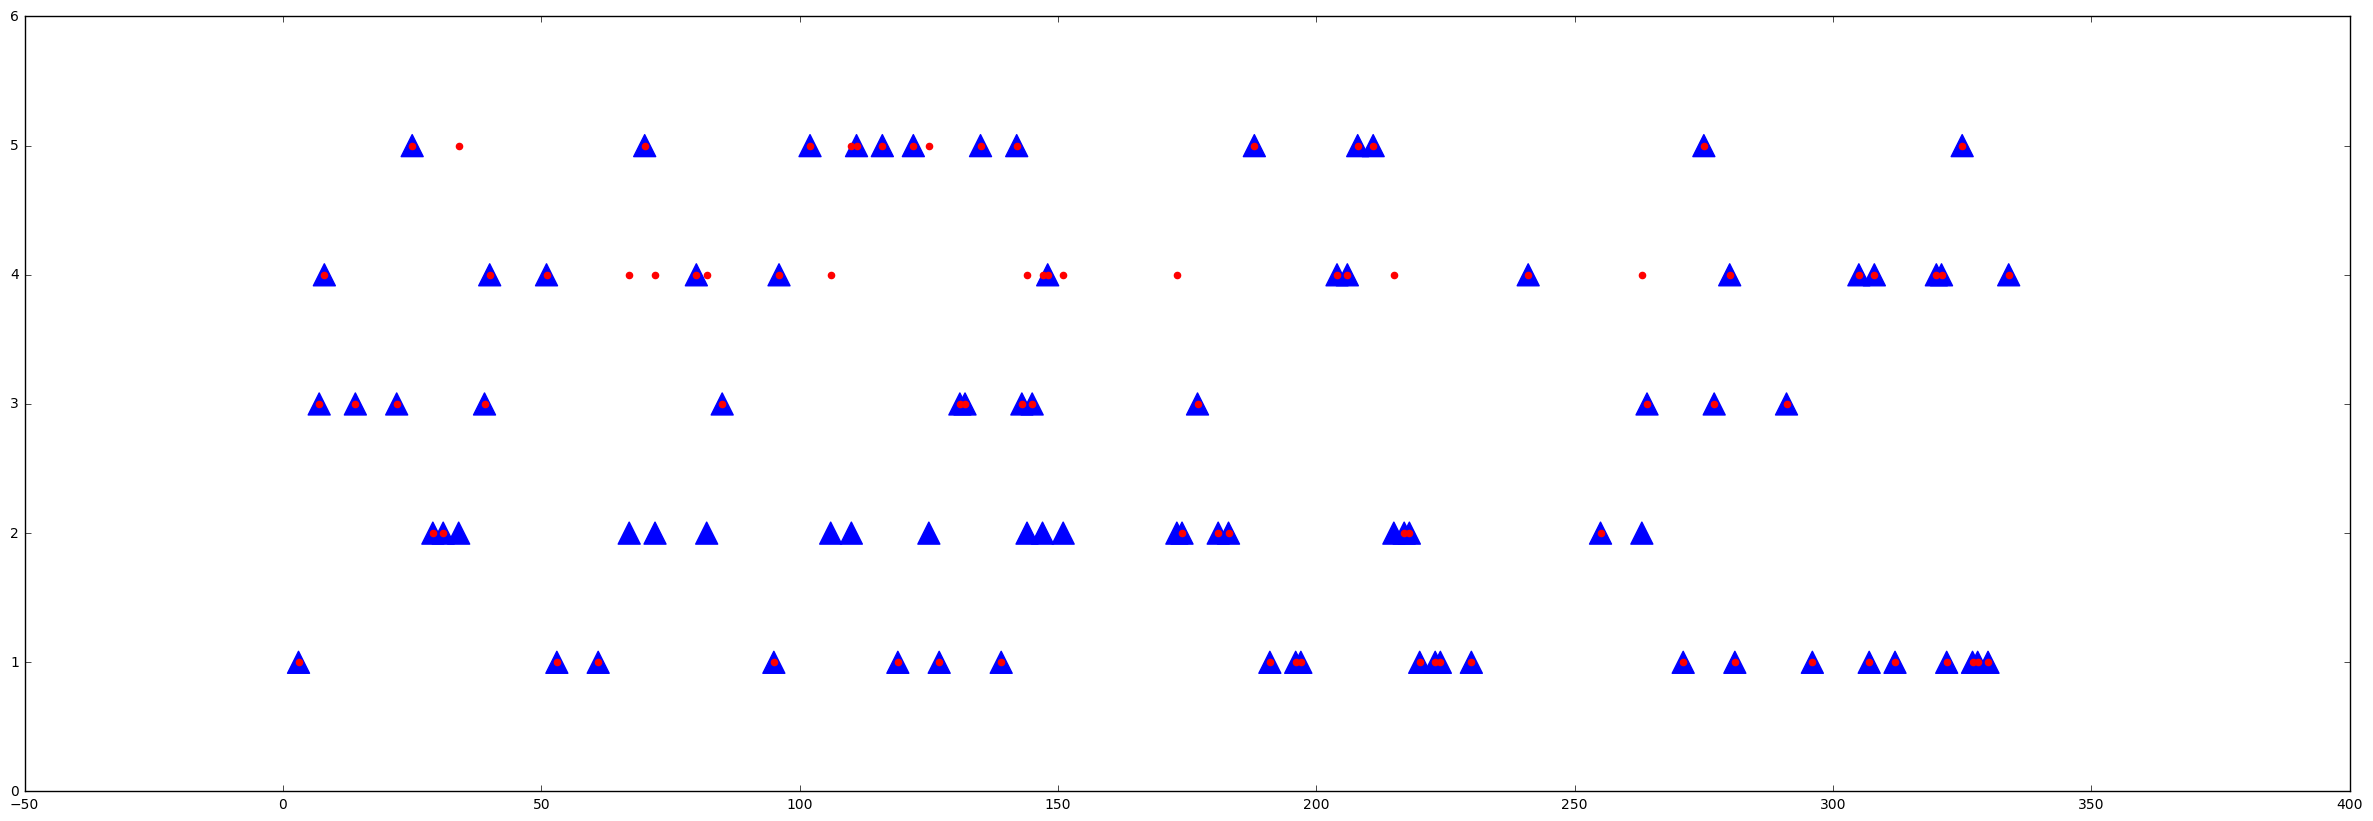

In [15]:
#all results
import numpy as np
import matplotlib.pyplot as plt


rows= test_data.axes[0]
rows = [elem for elem in rows]



X = rows
Y = test_results

plt.figure(figsize=(30,10))

# s = [float(12*n) for n in range(len(X))]
s = [251 for n in range(len(X))]

plt.scatter(X,Y,marker='^',color='b',edgecolors='b',s=s)
plt.scatter(X,predicted,marker='o',color='r')


plt.show()